#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 15 Validación  y Afinación Alumno: Ibarra Ramírez Sergio </font>

In [5]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

import pandas as pd
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")
y = tabla["E"]
X = tabla.drop(["E"],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2023)

#### Cross Validation

In [1]:
from sklearn.model_selection import cross_val_score

In [9]:
scores_r2 = cross_val_score(modelo,X_train,y_train,cv=5,scoring="r2") # r2_score
scores_r2

array([0.8245493 , 0.89744224, 0.84398883, 0.91239596, 0.91586695])

In [10]:
scores_r2.mean()

0.8788486556808508

#### Scorings

- neg_mean_absolute_error
- neg_root_mean_squared_error
- neg_mean_squared_error

In [11]:
scores_MAE = cross_val_score(modelo,X_train,y_train,cv=5,scoring="neg_mean_absolute_error") # r2_score
scores_MAE

array([-0.0291056 , -0.02151056, -0.0280559 , -0.02018455, -0.01795786])

In [12]:
scores_MAE.mean()

-0.023362893468563895

#### Grid Search y Randomize Search 

Ejemplo de uso de Grid Search para ajustar hiperparámetros de SVM 

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.datasets import load_iris

tabla = load_iris(as_frame=True)

y = tabla.frame["target"]
X = tabla.frame.drop(["target"],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2023)

from sklearn.svm import SVC

modelo = SVC()
modelo

SVC()

In [16]:
cuadricula_parametros = [{'C':[1,10,100,1000],'kernel':["linear","poly","rbf"]}]
cuadricula_parametros

[{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']}]

Se define y entrena el GridSearch 

In [18]:
buscadorGrid = GridSearchCV(modelo,cuadricula_parametros,cv=5,scoring="accuracy")
buscadorGrid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy')

Y podemos ver los parámetros que obtuvo 

In [19]:
buscadorGrid.best_params_

{'C': 1, 'kernel': 'linear'}

Ejemplo de uso de Random Search para ajustar hiperparámetros de SVM 

In [21]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

distribucion_parametros = [{'C':loguniform(1e0,1e3),
                            'kernel':["linear","poly","rbf"]}]

buscadorRandom = RandomizedSearchCV(modelo,distribucion_parametros,cv=5,scoring="accuracy")
buscadorRandom.fit(X_train,y_train)

buscadorRandom.best_params_

{'C': 32.68570311316844, 'kernel': 'rbf'}

##### Ejemplo de Curvas de validación 

In [22]:
from sklearn.model_selection import validation_curve

rangoC =[0.0001,0.001,0.01,0.1,1,10,100,1000]

train_scores,valid_scores = validation_curve(modelo,X_train,y_train,param_name="C",param_range=rangoC,cv=5)


##Donde se obtiene cada valor del score definido en la cross_validation 
train_scores

array([[0.35416667, 0.36458333, 0.36458333, 0.35416667, 0.35416667],
       [0.35416667, 0.36458333, 0.36458333, 0.35416667, 0.35416667],
       [0.35416667, 0.36458333, 0.36458333, 0.35416667, 0.35416667],
       [0.90625   , 0.8125    , 0.77083333, 0.86458333, 0.92708333],
       [0.94791667, 0.94791667, 0.96875   , 0.95833333, 0.96875   ],
       [0.96875   , 0.97916667, 0.98958333, 0.98958333, 0.98958333],
       [0.96875   , 0.95833333, 0.98958333, 0.97916667, 0.97916667],
       [0.96875   , 0.97916667, 0.98958333, 0.98958333, 0.97916667]])

Y se grafica entrenamiento y validación (QUE MUESTRA EL PUNTO DE SOBRE AJUSTE PARA DIFERENTES VALORES DEL HIPERARPARÁMETRO QUE AQUI SE LLAMA RANGO C )

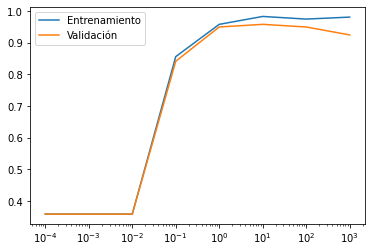

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Los scores traen uno por fold, asi que para graficar una línea, necesito promediarlos
from statistics import mean
train_values = [mean(lista) for lista in train_scores]
valid_values = [mean(lista) for lista in valid_scores]

fig, ax = plt.subplots()
ax.plot(rangoC,train_values,label='Entrenamiento')
ax.plot(rangoC,valid_values,label='Validación')
ax.legend()
ax.set_xscale('log')